# Final Project
# 1st Problem 
# Mahla Entezari

In the first step, I installed the required libraries and imported them.

Then I read the data frame of the news text and found the data set of Bitcoin price changes from Kaggle and read it as well.

In [1]:
pip install gradio

Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 208.6 kB/s eta 0:00:0000:0200:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 594.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 569.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 541.6 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools

In [2]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached regex-2024.11.6-cp39-cp39-macosx_11_0_arm64.whl.metadata (40 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 701.9 kB/s eta 0:00:00:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 601.5 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import gradio as gr
import seaborn as sns
from textblob import TextBlob
from scipy.sparse import hstack
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA


/Users/mahla/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mahla/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_crypto = pd.read_csv('cryptonews.csv', parse_dates=['date'])
df_bitcoin = pd.read_csv('bitcoin.csv', parse_dates=['date'])
df_crypto.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19 06:03:24,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19 05:35:26,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19 05:31:08,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...


Then I displayed them to get an idea of ​​what kind of data the dataframes contain.

After that, I drew a graph that showed the number of news according to the source that published it, and it can be seen that the most news is from cointelegraph and the least from cryptopotato.

And I also drew the data distribution according to subject.

In [5]:
df_bitcoin.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05,273.220,1.550381e+08,3.740880e+09,bitcoin


In [6]:
df_crypto.describe()

,date,sentiment,source,subject,text,title,url
count,31037,31037,31037,31037,31037,31037,31037
unique,30497,3931,3,6,30423,30964,31037
top,2022-01-14 00:00:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,bitcoin,"Get your daily, bite-sized digest of cryptoass...",Is it Too Late to Buy Shiba Inu? Crypto Expert...,https://cryptonews.comhttps://cryptonews.com/n...
freq,26,6916,13010,9968,447,4,1


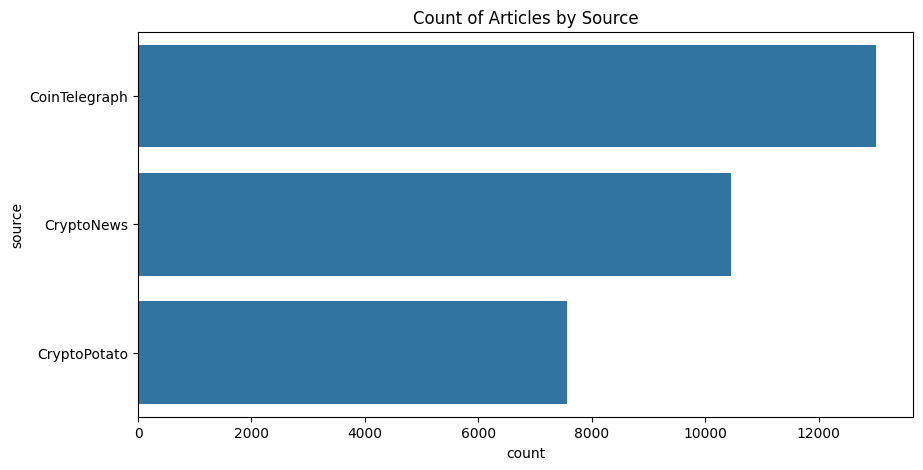

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df_crypto['source'], order=df_crypto['source'].value_counts().index)
plt.title('Count of Articles by Source')
plt.show()

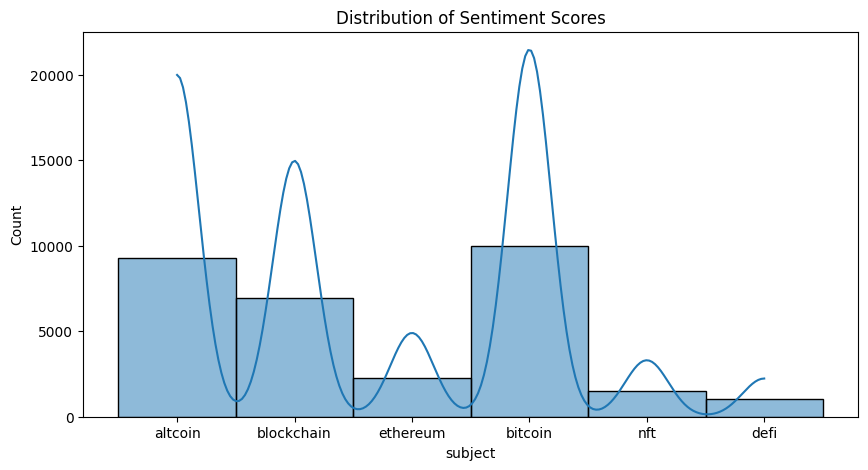

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df_crypto['subject'].dropna(), bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()

In this step, I converted the date column of the dataframes to the standard date format and deleted their empty values.

Then I printed their minimum and maximum to see what range they are both in.

As it can be seen, the time frame in which the news data frame is located is below the time frame of the bitcoin price data frame.

In [9]:
df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date'])
df_crypto['date'] = pd.to_datetime(df_crypto['date'], format='mixed')

In [10]:
df_bitcoin['date'] = df_bitcoin['date'].dt.date
df_crypto['date'] = df_crypto['date'].dt.date

In [11]:
df_bitcoin = df_bitcoin.dropna(subset=['date'])
df_crypto = df_crypto.dropna(subset=['date'])

In [12]:
print(df_bitcoin['date'].min(), df_bitcoin['date'].max())
print(df_crypto['date'].min(), df_crypto['date'].max())

2015-01-01 2024-03-27
2021-10-12 2023-12-19


Then I make changes in the data stored in the columns. In this way, I extract three features from sentiment using eval.

Features of class, polarity and subjectivity.

Class means three categories of increase, decrease and neutral.

Polarity means a value between -1 and +1 that indicates the positive or negative message of the sentence.

In [13]:
eval(df_crypto['sentiment'][0])

{'class': 'negative', 'polarity': -0.1, 'subjectivity': 0.6}

In [14]:
df_crypto['sentiment'] = df_crypto['sentiment'].map(lambda x: eval(x))

df_crypto['sentiment_class'] = df_crypto['sentiment'].map(lambda x: x['class'])
df_crypto['sentiment_polarity'] = df_crypto['sentiment'].map(lambda x: x['polarity'])
df_crypto['sentiment_subjectivity'] = df_crypto['sentiment'].map(lambda x: x['subjectivity'])

In [15]:
df_crypto.loc[df_crypto['sentiment_class'] == 'negative', 'sentiment_class'] = -1
df_crypto.loc[df_crypto['sentiment_class'] == 'neutral', 'sentiment_class'] = 0
df_crypto.loc[df_crypto['sentiment_class'] == 'positive', 'sentiment_class'] = 1

In [16]:
df_crypto

,date,sentiment,source,subject,text,title,url,sentiment_class,sentiment_polarity,sentiment_subjectivity
0,2023-12-19,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,-1,-0.10,0.60
1,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,0,0.00,0.00
2,2023-12-19,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,1,0.05,0.05
3,2023-12-19,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,1,0.50,0.90
4,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
31032,2021-10-27,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,https://cryptonews.com/news/cream-finance-suff...,0,0.00,0.00
31033,2021-10-19,"{'class': 'positive', 'polarity': 0.1, 'subjec...",CryptoNews,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,https://cryptonews.com/news/french-central-ban...,1,0.10,0.40
31034,2021-10-18,"{'class': 'positive', 'polarity': 0.14, 'subje...",CryptoNews,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",https://cryptonews.com/news/facebook-to-add-10...,1,0.14,0.45
31035,2021-10-15,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,https://cryptonews.com/news/tech-crackdown-has...,0,0.00,0.00


Now it's time to use tfidf to vectorize sentences.

Here we use the text of the message and its title as the main determining factors.

In [17]:
# vectorizer = TfidfVectorizer(stop_words='english') 
# Title_tfidf = vectorizer.fit_transform(df_crypto['title'])
# Text_tfidf = vectorizer.fit_transform(df_crypto['text'])

Here I wanted to use PCA because the number of features was very large.

In [18]:
# numPCA = 5
# pca = PCA(n_components=numPCA)

# Title_tfidf = pca.fit_transform(Title_tfidf.toarray()) 
# Text_tfidf = pca.fit_transform(Text_tfidf.toarray())
# X_tfidf = np.concatenate((Title_tfidf,Text_tfidf), axis = 1)

In [19]:
# for i in range(numPCA):
#     df_crypto['Title_tfidf'+str(i)] = Title_tfidf[:,i]
#     df_crypto['Text_tfidf'+str(i)] = Text_tfidf[:,i]
# df_crypto    

In [20]:
print(df_crypto['source'].unique())
print(df_crypto['subject'].unique())

['CryptoNews' 'CoinTelegraph' 'CryptoPotato']
['altcoin' 'blockchain' 'ethereum' 'bitcoin' 'nft' 'defi']


Now we will specifically focus on cryptonews and bitcoin.

In [21]:
df_crypto['polarity'] = np.zeros(df_crypto.shape[0])

newspaper = 'CryptoNews'

coin = 'bitcoin'

df_source = df_crypto[df_crypto['source'] == 'CryptoNews']
df_source.head()

,date,sentiment,source,subject,text,title,url,sentiment_class,sentiment_polarity,sentiment_subjectivity,polarity
0,2023-12-19,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,-1,-0.10,0.60,0.0
1,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,0,0.00,0.00,0.0
2,2023-12-19,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,1,0.05,0.05,0.0
6,2023-12-19,"{'class': 'positive', 'polarity': 0.3, 'subjec...",CryptoNews,bitcoin,Cathie Wood led ARK Invest fund sold around 80...,Cathie Wood’s Ark Invest Sells $27.6 Million i...,https://cryptonews.comhttps://cryptonews.com/n...,1,0.30,0.10,0.0
8,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,The South Korean city of Busan is edging close...,South Korean City Busan Names Digital Exchange...,https://cryptonews.comhttps://cryptonews.com/n...,0,0.00,0.00,0.0


We add a column of changes in the dataframe, whose values ​​for each row take two values ​​less or more based on the previous row.

In [22]:
df_bitcoin['changes'] = df_bitcoin['price'].shift(1)
df_bitcoin = df_bitcoin[1:]

def up_or_down(today, yesterday):
    if today > yesterday:
        return 1
    else:
        return -1

df_bitcoin['up_or_down'] = df_bitcoin[['price', 'changes']].apply(lambda x:up_or_down(*x), axis=1)
df_bitcoin = df_bitcoin[['date', 'up_or_down']]

df_bitcoin

,date,up_or_down
1,2015-01-02,1
2,2015-01-03,-1
3,2015-01-04,-1
4,2015-01-05,1
5,2015-01-06,1
...,...,...
3368,2024-03-23,-1
3369,2024-03-24,1
3370,2024-03-25,1
3371,2024-03-26,1


Now, for each title, we perform the polarity function to extract its polarity and subjectivity.

In [23]:
def text_polarity(text_str):
    text_polarity = TextBlob(text_str).sentiment
    return text_polarity

print(df_crypto.loc[0,'title'])
text_polarity(df_crypto.loc[0,'title'])

Grayscale CEO Calls for Simultaneous Approval of Spot Products to Level the Field


Sentiment(polarity=0.0, subjectivity=0.0)

In [24]:
df_crypto

,date,sentiment,source,subject,text,title,url,sentiment_class,sentiment_polarity,sentiment_subjectivity,polarity
0,2023-12-19,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,-1,-0.10,0.60,0.0
1,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,0,0.00,0.00,0.0
2,2023-12-19,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,1,0.05,0.05,0.0
3,2023-12-19,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,1,0.50,0.90,0.0
4,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31032,2021-10-27,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,https://cryptonews.com/news/cream-finance-suff...,0,0.00,0.00,0.0
31033,2021-10-19,"{'class': 'positive', 'polarity': 0.1, 'subjec...",CryptoNews,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,https://cryptonews.com/news/french-central-ban...,1,0.10,0.40,0.0
31034,2021-10-18,"{'class': 'positive', 'polarity': 0.14, 'subje...",CryptoNews,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",https://cryptonews.com/news/facebook-to-add-10...,1,0.14,0.45,0.0
31035,2021-10-15,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,https://cryptonews.com/news/tech-crackdown-has...,0,0.00,0.00,0.0


In [25]:
df_crypto['title_polarity'] = df_crypto['title'].apply(lambda x:text_polarity(x))

Here we merge the two dataframes of Bitcoin and Crypto in such a way that for one date column, the data of both dataforms are placed together.

 So that for each date, we have both the news published on it and the changes in the price of Bitcoin that occur on that day.

In [26]:
df_crypto = pd.merge(df_crypto, df_bitcoin, how='inner', left_on='date', right_on='date')
df_crypto.columns

Index(['date', 'sentiment', 'source', 'subject', 'text', 'title', 'url',
       'sentiment_class', 'sentiment_polarity', 'sentiment_subjectivity',
       'polarity', 'title_polarity', 'up_or_down'],
      dtype='object')

In [27]:
# train_data = np.array([
#     df_crypto['polarity'],
# ]).T

In [28]:
# X_data = Title_tfidf
# y_data = df_crypto['up_or_down']

# print('X_train.shape = ', X_data.shape)
# print('y_train.shape = ', y_data.shape)

Then it's time to divide the data and then build the model and training and then test it.

In this problem, I have used knn model for clustering.

In [29]:
split_index = int(len(df_crypto) * 4 / 5)

train_data = df_crypto[:split_index]
test_data = df_crypto[split_index:]


X_train_title = train_data['title']
X_train_text = train_data['text']
y_train = train_data['up_or_down']

X_test_title = test_data['title']
X_test_text = test_data['text']
y_test = test_data['up_or_down']

In [30]:
vectorizer = TfidfVectorizer(stop_words='english')
Title_tfidf_train = vectorizer.fit_transform(X_train_title)
Text_tfidf_train = vectorizer.transform(X_train_text)

Title_tfidf_test = vectorizer.transform(X_test_title)
Text_tfidf_test = vectorizer.transform(X_test_text)

X_train_tfidf = hstack([Title_tfidf_train, Text_tfidf_train])
X_test_tfidf = hstack([Title_tfidf_test, Text_tfidf_test])

This diagram is for better visualization of the data, which has been reduced to 2 dimensions.

It reveals a main dense cluster and a separate smaller cluster, suggesting distinct groups within the document set.

/var/folders/rf/x4s3m6qd51gcvc25nv1bpdl40000gn/T/ipykernel_3090/926296132.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


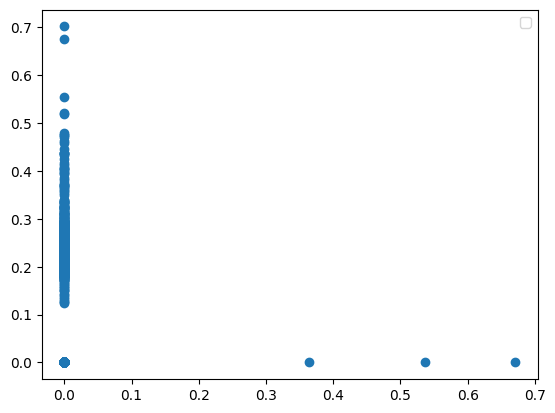

In [31]:
X_train_tfidf = X_train_tfidf.toarray()
plt.scatter(X_train_tfidf[:,0],X_train_tfidf[:,1])
plt.legend() 
plt.show()

In [32]:
svd = TruncatedSVD(n_components=1)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

In [33]:
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train_tfidf)

# X_test_pca = pca.fit_transform(X_test_tfidf)

In [34]:
# X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, train_size = 0.8)

# print("X_train.shape = ", X_train.shape)
# print("X_test.shape = ", X_test.shape)

In [35]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)
knn.fit(X_train_svd, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10, weights='distance')

In [36]:
y_pred1 = knn.predict(X_train_svd)

accuracy = np.mean(y_train == y_pred1)
print('Accuracy (train) =', accuracy)

Accuracy (train) = 0.9997986225784365


In [37]:
y_pred2 = knn.predict(X_test_svd)
accuracy = np.mean(y_test == y_pred2)
print('Accuracy (test) =', accuracy)

Accuracy (test) = 0.4953286082474227


In [38]:
def predict(title):
    inp = vectorizer.transform([title])
    # _svd = svd(n_components=1)
    inp = svd.transform(inp) 
    prediction = knn.predict(inp)
    return ["Down", "Zero", "Up"][prediction[0]].reshape(1, -1)

interface = gr.Interface(
    fn=predict,
    inputs=gr.Textbox(lines=2, placeholder="news title"),
    outputs="text",
    title="Prediction",
    description="Predict Bitcoin's price",
)

interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
